In [1]:
import time
import math

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from polylidar import extractPlanesAndPolygons
from polylidarutil import (generate_test_points, plot_points, plot_triangles, get_estimated_lmax,
                            plot_triangle_meshes, get_triangles_from_he, get_plane_triangles, plot_polygons)

%matplotlib notebook

### Basic 2D Polylidar

Took 0.97 milliseconds


<IPython.core.display.Javascript object>


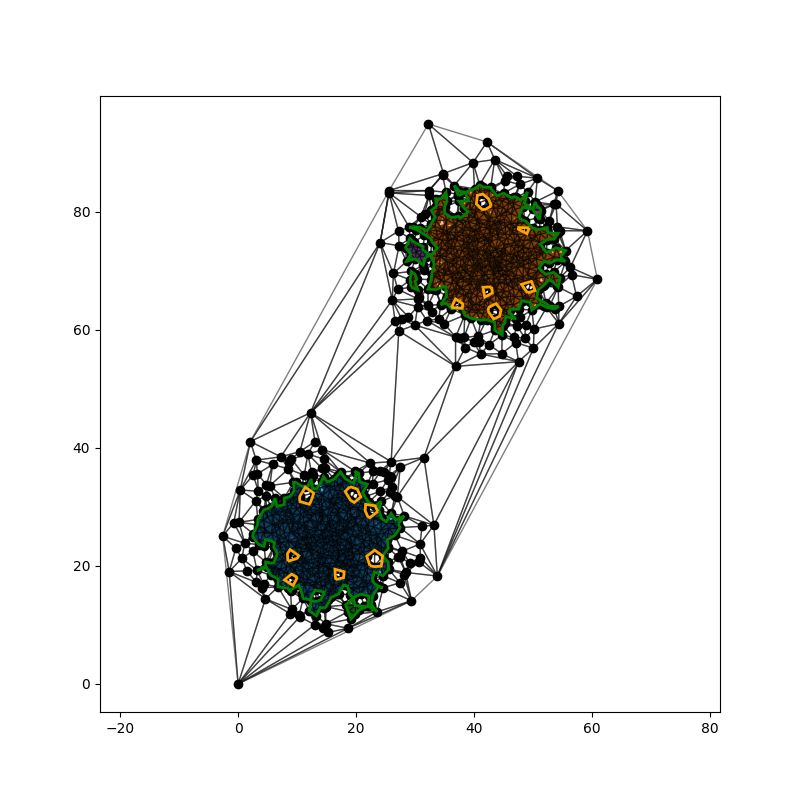

In [2]:
kwargs = dict(num_groups=2, group_size=1000, dist=100.0, seed=1)
# generate random normally distributed clusters of points, 200 X 2 numpy array.
points = generate_test_points(**kwargs)
lmax = get_estimated_lmax(**kwargs)

# Extracts planes and polygons, time
t1 = time.time()
delaunay, planes, polygons = extractPlanesAndPolygons(points, alpha=0.0, lmax=lmax, minTriangles=5)
t2 = time.time()
print("Took {:.2f} milliseconds".format((t2 - t1) * 1000))

# Plot Data
if points.shape[0] < 100000:
    fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1)
    # plot points
    plot_points(points, ax)
    # plot all triangles
    plot_triangles(get_triangles_from_he(delaunay.triangles, points), ax)
    # plot mesh triangles
    triangle_meshes = get_plane_triangles(planes, delaunay.triangles, points)
    plot_triangle_meshes(triangle_meshes, ax)
    # plot polygons
    plot_polygons(polygons, delaunay, points, ax)

    plt.axis('equal')

    plt.show()

### Basic 3D Polylidar

Took 0.31 milliseconds
Should see two planes extracted, please rotate.


<IPython.core.display.Javascript object>


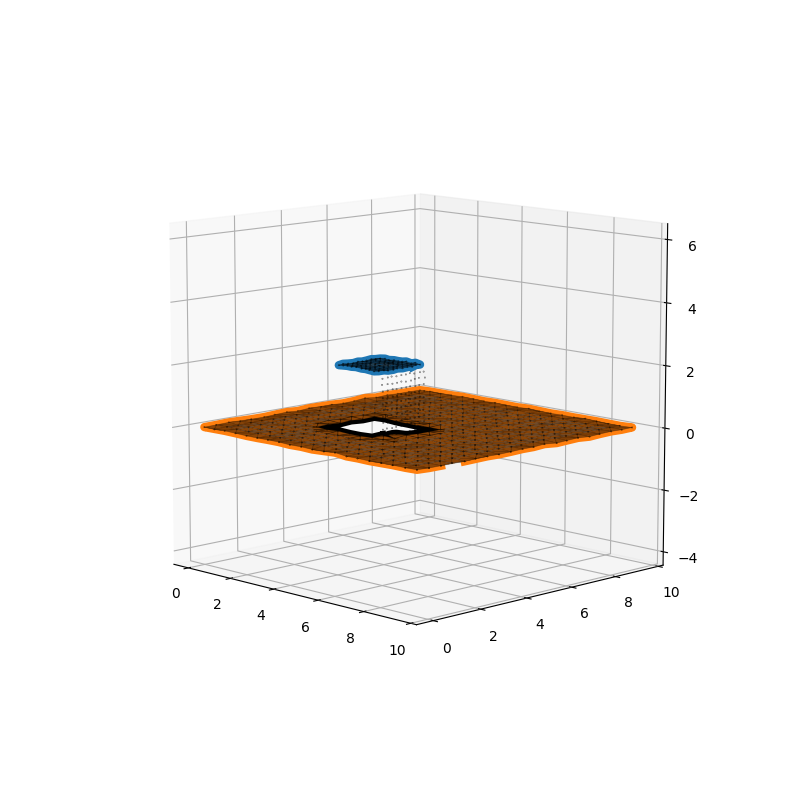

In [4]:
from polylidarutil import (plot_polygons_3d, generate_3d_plane, set_axes_equal, plot_planes_3d,
                           scale_points, rotation_matrix, apply_rotation)
np.random.seed(1)
# generate random plane with hole
plane = generate_3d_plane(bounds_x=[0, 10, 0.5], bounds_y=[0, 10, 0.5], holes=[
                          [[3, 5], [3, 5]]], height_noise=0.02, planar_noise=0.02)
# Generate top of box (causing the hole that we see)
box_top = generate_3d_plane(bounds_x=[3, 5, 0.2], bounds_y=[3, 5, 0.2], holes=[
], height_noise=0.02, height=2, planar_noise=0.02)
# Generate side of box (causing the hole that we see)
box_side = generate_3d_plane(bounds_x=[0, 2, 0.2], bounds_y=[
                             0, 2, 0.2], holes=[], height_noise=0.02, planar_noise=0.02)
rm = rotation_matrix([0,1,0], -math.pi/2.0)
box_side = apply_rotation(rm, box_side) + [5, 3, 0]
# box_side = r.apply(box_side) + [5, 3, 0]
# All points joined together
points = np.concatenate((plane, box_side, box_top))

# Extracts planes and polygons, time
t1 = time.time()
delaunay, planes, polygons = extractPlanesAndPolygons(
    points, xyThresh=0.0, alpha=0.0, lmax=1.0, minTriangles=20, zThresh=0.1, normThresh=0.98)
t2 = time.time()
print("Took {:.2f} milliseconds".format((t2 - t1) * 1000))
print("Should see two planes extracted, please rotate.")

triangles = np.asarray(delaunay.triangles).reshape(
    int(len(delaunay.triangles) / 3), 3)
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1,
                       subplot_kw=dict(projection='3d'))
# plot all triangles
plot_planes_3d(points, triangles, planes, ax)
plot_polygons_3d(points, polygons, ax)
# plot points
ax.scatter(*scale_points(points), c='k', s=0.1)
set_axes_equal(ax)
ax.view_init(elev=15., azim=-35)
plt.show()
print("")